In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime as dt
from dateutil.relativedelta import relativedelta
import sys
import pyodbc
import sklearn.metrics
from sklearn.metrics import r2_score


from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
inputs = pd.read_csv('../data/csv/Gold_DataRF.csv')
training_set = inputs[['Money Manager Shorts', 'Money Manager Longs', 'Ten_Yr_Futures_Settle', 'USD_Change']]
training_set_y = inputs[['Gold_Settle']]

In [3]:
RF_Model = RF(n_estimators = 100, random_state = 0)
RF_Model.fit(training_set.values, training_set_y.values.ravel())

LR_Model = LR()
LR_Model.fit(training_set.values, training_set_y.values)

KNN_Model = KNeighborsRegressor(n_neighbors=5)
KNN_Model.fit(training_set.values, training_set_y.values)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [4]:
inputs.head()

,Business_Week,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
0,"[2006-06-07, 2006-06-13]",0,0.0,602.80,324.80000,189517.8,6/13/2006,382474,30916,103211,...,1.760,85.7620,7364.2,NaN,38753.4,0.0760,6.7790,65.00,NaN,2332.40
1,"[2006-06-14, 2006-06-20]",1,0.0,570.50,78.40000,191302.8,6/20/2006,390281,30963,94632,...,0.013,86.2112,772.6,NaN,37679.6,0.1175,6.9283,45.00,NaN,2276.80
2,"[2006-06-21, 2006-06-27]",2,0.0,584.18,51.80000,189599.0,6/27/2006,384321,32287,91042,...,0.340,86.0000,5056.2,NaN,23433.4,0.1715,7.4125,359.25,NaN,2395.75
3,"[2006-06-28, 2006-07-04]",3,0.0,594.40,31923.66667,297778.0,7/3/2006,392868,30452,92545,...,-1.300,85.2640,2935.2,NaN,19682.8,-0.2920,7.1685,35.60,NaN,2007.00
4,"[2006-07-05, 2006-07-11]",4,0.0,634.00,43180.20000,253799.8,7/11/2006,427008,27624,104213,...,0.230,85.0220,2823.0,NaN,19415.6,0.0960,7.1820,186.20,NaN,2227.00


In [5]:
training_set.head()

,Money Manager Shorts,Money Manager Longs,Ten_Yr_Futures_Settle,USD_Change
0,30916,103211,105.86250,1.760
1,30963,94632,105.01875,0.013
2,32287,91042,104.33125,0.340
3,30452,92545,104.53125,-1.300
4,27624,104213,104.71250,0.230


In [6]:
predict = [[38789, 103211, 105.86250, 1.760]]
RF_Model.predict(predict)

array([607.0098])

In [7]:
predict = [[30916, 103211, 105.86250, 1.760]]
LR_Model.predict(predict)

array([[626.27754017]])

In [8]:
predict = [[30916, 103211, 105.86250, 1.760]]
KNN_Model.predict(predict)

array([[825.024]])

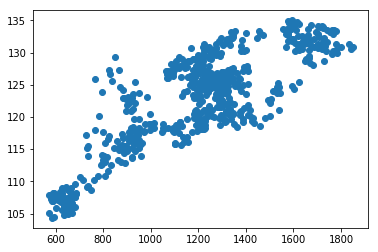

In [9]:
plt.scatter(inputs['Gold_Settle'], inputs['Ten_Yr_Futures_Settle'])

In [10]:
inputs.corr()

,Week_Count,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Ten_Yr_Futures_Change,Ten_Yr_Futures_Settle,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
Week_Count,1.000000,0.705706,0.523526,0.061057,-0.010958,0.509991,0.602316,0.136952,0.712663,0.580526,...,0.018850,0.746076,0.566248,0.009011,0.500303,-0.011942,0.879467,-0.246878,0.433814,-0.108374
Gold_Change,0.705706,1.000000,0.125073,-0.026263,-0.112733,0.213891,0.410246,0.119053,0.836891,0.325307,...,0.013281,0.704863,0.459164,-0.021378,0.491195,-0.040158,0.777315,-0.169667,-0.014597,-0.044964
Gold_Settle,0.523526,0.125073,1.000000,0.116554,0.144779,0.716232,0.029869,0.344567,0.112412,0.831606,...,-0.001437,0.008033,0.528059,-0.140107,0.361847,-0.005132,0.170779,-0.096442,-0.145784,0.098861
Gold_Volume,0.061057,-0.026263,0.116554,1.000000,0.345167,0.204718,0.014332,0.103823,-0.042382,0.082029,...,-0.002993,-0.004330,0.099460,-0.023684,0.016684,-0.028734,0.008952,-0.048358,0.079868,0.072147
Gold_Prev. Day Open Interest,-0.010958,-0.112733,0.144779,0.345167,1.000000,0.331177,-0.091053,0.329834,-0.138688,0.068943,...,0.009125,-0.104979,0.032049,0.059998,-0.094674,-0.001036,-0.060065,0.028942,0.262475,0.003014
Open Interest,0.509991,0.213891,0.716232,0.204718,0.331177,1.000000,0.036690,0.655936,0.172237,0.564668,...,-0.031625,0.094698,0.434261,-0.039130,0.200815,-0.032690,0.235755,-0.070656,0.251143,0.146258
Money Manager Shorts,0.602316,0.410246,0.029869,0.014332,-0.091053,0.036690,1.000000,-0.444781,0.477380,0.114371,...,0.036623,0.617084,0.358060,0.127332,0.414574,0.076535,0.635832,-0.156514,0.204241,-0.224343
Money Manager Longs,0.136952,0.119053,0.344567,0.103823,0.329834,0.655936,-0.444781,1.000000,0.061630,0.275529,...,-0.085365,-0.074172,0.102968,-0.052256,-0.061050,-0.114844,0.015022,-0.022207,0.144694,0.291347
Ten_Yr_Futures_Change,0.712663,0.836891,0.112412,-0.042382,-0.138688,0.172237,0.477380,0.061630,1.000000,0.324396,...,0.028902,0.747642,0.531633,0.118132,0.549313,0.008039,0.781597,-0.140927,-0.007449,-0.054046
Ten_Yr_Futures_Settle,0.580526,0.325307,0.831606,0.082029,0.068943,0.564668,0.114371,0.275529,0.324396,1.000000,...,0.007153,0.247929,0.597462,0.020475,0.529830,-0.015760,0.417406,-0.094735,0.124198,0.092219
